# <font color=gray>**Topic Detection**</font>

## <font color=gray>**Objective**</font>

Identify health-related topics from conversational data like Twitter. The twitter data from various health news twitter handles is available below. Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/00438/Health-News-Tweets.zip

## <font color=gray>**Task 1**</font>

Implement a topic detection/clustering approach to clustering and share your code, overall approach along with the cluster outputs (representative keywords or ngrams from the topics/cluster your method discovers).

### <font color=tan>**Steps Involved**</font>
 - **Import Dependencies**
 - **Import tweets data into a pandas dataframe**
 - **Data Preprocessing**
     - Removing URLs and Usernames
     - Removing Stopwords and Stemming
     - Removing digits and short words (not abbreviations)
 - **Adding Bigrams/Trigrams**
 - **Building a dictionary and assigning numbers to words**
 - **Modelling Method**
     - LDA Python Implementation
     - Measuring Model Perforamnce
         - *Get Coherence Plots to get the optimum number of topics*
 - **Visualizing results**
     - Word Cloud for top 10 words/ngrams in a topic
     - Writing cluster output
     - pyLDAvis Visualization
 - **Conclusion**

 ### <font color=tan>**Import dependencies**</font>

In the first step we import all the dependencies.

You have to install the packages gensim, wordcloud and pyLDAvis if they are not currently installed.

In [21]:
import pandas as pd
import glob
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import string
import re

import gensim
from gensim.models import Phrases
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from numpy import array

import pyLDAvis.gensim

from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from wordcloud import WordCloud, STOPWORDS

import time

### <font color=tan>**Import tweets data into a pandas dataframe**</font>
The downloaded data is saved in a folder "Health-Tweets" in the root directory. Let's download this data into a dataframe.I encountered several failures when I tried to read the data:
- some files use ISO-8859-1 encoding (Try and except block used to deal with this)
- some lines have '|' in the comments which is a delimiter for the file (I have skipped these lines for now using error_bad_lines = False)<br>

Finally we rename the columns of the data and our tweets data is ready.

In [2]:
files = glob.glob("Health-Tweets/*.txt")

data = pd.DataFrame({})
for i in files:
    try:
        data_i = pd.read_csv(i, 
                             sep ="|", 
                             header =  None,
                             error_bad_lines = False)
    except UnicodeDecodeError:
        print("Using ISO-8859-1 encoding for %s"%(i))
        data_i = pd.read_csv(i, 
                             sep ="|", 
                             header =  None,
                             error_bad_lines = False,
                             encoding = "ISO-8859-1")
    data = pd.concat([data, data_i], axis = 0)

data.columns = ['ID','Date','Comment']

data.reset_index(drop = True, inplace = True)

b'Skipping line 846: expected 3 fields, saw 4\nSkipping line 904: expected 3 fields, saw 4\nSkipping line 914: expected 3 fields, saw 4\nSkipping line 1264: expected 3 fields, saw 4\nSkipping line 1269: expected 3 fields, saw 4\nSkipping line 1293: expected 3 fields, saw 4\nSkipping line 1348: expected 3 fields, saw 4\nSkipping line 1430: expected 3 fields, saw 4\nSkipping line 1486: expected 3 fields, saw 4\nSkipping line 1710: expected 3 fields, saw 4\nSkipping line 2699: expected 3 fields, saw 4\nSkipping line 2728: expected 3 fields, saw 4\nSkipping line 3000: expected 3 fields, saw 4\n'
b'Skipping line 1422: expected 3 fields, saw 4\nSkipping line 1461: expected 3 fields, saw 4\nSkipping line 1468: expected 3 fields, saw 4\nSkipping line 1507: expected 3 fields, saw 4\nSkipping line 1547: expected 3 fields, saw 4\nSkipping line 1728: expected 3 fields, saw 4\nSkipping line 1738: expected 3 fields, saw 4\nSkipping line 1742: expected 3 fields, saw 4\nSkipping line 1847: expected 3 

Using ISO-8859-1 encoding for Health-Tweets\foxnewshealth.txt
Using ISO-8859-1 encoding for Health-Tweets\KaiserHealthNews.txt


b'Skipping line 638: expected 3 fields, saw 4\nSkipping line 966: expected 3 fields, saw 4\nSkipping line 1890: expected 3 fields, saw 4\nSkipping line 2601: expected 3 fields, saw 4\nSkipping line 2602: expected 3 fields, saw 4\nSkipping line 2606: expected 3 fields, saw 4\nSkipping line 2609: expected 3 fields, saw 4\nSkipping line 2611: expected 3 fields, saw 4\nSkipping line 2627: expected 3 fields, saw 4\nSkipping line 2642: expected 3 fields, saw 4\nSkipping line 2647: expected 3 fields, saw 4\nSkipping line 2656: expected 3 fields, saw 4\nSkipping line 2662: expected 3 fields, saw 4\nSkipping line 2663: expected 3 fields, saw 4\nSkipping line 2664: expected 3 fields, saw 4\nSkipping line 2665: expected 3 fields, saw 4\nSkipping line 2667: expected 3 fields, saw 4\nSkipping line 2670: expected 3 fields, saw 4\n'
b'Skipping line 4015: expected 3 fields, saw 4\nSkipping line 6118: expected 3 fields, saw 4\nSkipping line 6354: expected 3 fields, saw 4\nSkipping line 6429: expected 3

Using ISO-8859-1 encoding for Health-Tweets\msnhealthnews.txt
Using ISO-8859-1 encoding for Health-Tweets\NBChealth.txt
Using ISO-8859-1 encoding for Health-Tweets\wsjhealth.txt


b'Skipping line 71: expected 3 fields, saw 4\nSkipping line 88: expected 3 fields, saw 4\nSkipping line 130: expected 3 fields, saw 4\nSkipping line 145: expected 3 fields, saw 4\nSkipping line 257: expected 3 fields, saw 4\nSkipping line 272: expected 3 fields, saw 4\nSkipping line 325: expected 3 fields, saw 4\nSkipping line 401: expected 3 fields, saw 4\nSkipping line 412: expected 3 fields, saw 4\nSkipping line 426: expected 3 fields, saw 4\nSkipping line 507: expected 3 fields, saw 4\nSkipping line 813: expected 3 fields, saw 4\nSkipping line 1319: expected 3 fields, saw 4\nSkipping line 1576: expected 3 fields, saw 4\nSkipping line 1592: expected 3 fields, saw 4\nSkipping line 1686: expected 3 fields, saw 4\nSkipping line 1929: expected 3 fields, saw 4\nSkipping line 2019: expected 3 fields, saw 4\nSkipping line 2359: expected 3 fields, saw 4\nSkipping line 2438: expected 3 fields, saw 4\nSkipping line 2679: expected 3 fields, saw 4\nSkipping line 2680: expected 3 fields, saw 4\n

In [45]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)
print(data.shape)
data[0:15]

(62817, 3)


,ID,Date,Comment
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/1CimpJF
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc.in/1ChTBRv
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc.in/1ChTANp
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bbc.in/1E6jAjt
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bbc.in/1CnLwK7
5,585733482413891584,Wed Apr 08 09:18:39 +0000 2015,Review of case against NHS manager http://bbc.in/1Ffj6ci
6,585733481608646657,Wed Apr 08 09:18:39 +0000 2015,"VIDEO: 'All day is empty, what am I going to do?' http://bbc.in/1N7wSSz"
7,585701601131765761,Wed Apr 08 07:11:58 +0000 2015,VIDEO: 'Overhaul needed' for end-of-life care http://bbc.in/1CmrRu3
8,585620828110397440,Wed Apr 08 01:51:00 +0000 2015,Care for dying 'needs overhaul' http://bbc.in/1FdSGrl
9,585437294120677376,Tue Apr 07 13:41:42 +0000 2015,VIDEO: NHS: Labour and Tory key policies http://bbc.in/1Ci5eqD


### <font color=tan>**Data Preprocessing**</font>
 - **Removing URLs** : Remove the URLs in the data using re.sub
 - **Removing Usernames** : Data has usernames that look like "@something". So, we remove them.
 - **Remove Stopwords** : We remove frequently occuring words like "the","him","your" and so on that do not add any value to the topic.
 - **Remove small words** : We remove small words which have less than 4 characters. Although a mojority of this would already be removed when we are removing the stop words but a few can be still three. We do not remove abbreviations like "HIV","CDC" which could essentially add value to the topic.
 - **Lemmatization** : We have to convert words to their root words to normalize the words. So, plays,playing and played all will be converted to the common root word play.
 
 We also remove the numbers from the data as it is unlikely to contribute to the topic and split the document into individual words.
 
 We have made a function docs_preprocessor that takes the array of comments as arguments and returns a list of lists as output. We will have a look at the output later.

In [46]:
def docs_preprocessor(docs):
    """
    Function to preprocess the tweets.
    """
    #remove website address from the tweets
    docs = [re.sub(r'http\S+', '', x, flags=re.MULTILINE) for x in docs]
    
    #remove usernames that start as 'RT @something'
    docs = [re.sub(r'RT @.*:', '', x, flags=re.MULTILINE) for x in docs]
    
    # Split into words.
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = tokenizer.tokenize(docs[idx])  

    # Remove stopwords
    stop = set(stopwords.words('english'))
    docs = [[token for token in doc if token not in stop] for doc in docs]
    
    # Remove numbers, but not words that contain numbers
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    #remove one letter tokens
    docs = [[token for token in doc if (len(token) > 1)] for doc in docs]
    
    # Remove small words that are not abbreviations(assuming abbreviations used are capitalized).
    docs = [[token for token in doc if (len(token) > 3) | (token.isupper())] for doc in docs]
    
    # Convert to lowercase
    docs = [[token.lower() for token in doc] for doc in docs]
    
    # Lemmatize all words in documents
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

In [83]:
docs = array(data['Comment'])
docs = docs_preprocessor(docs)

In [57]:
data['Comment'].head()

0    Breast cancer risk test devised http://bbc.in/1CimpJF     
1    GP workload harming care - BMA poll http://bbc.in/1ChTBRv 
2    Short people's 'heart risk greater' http://bbc.in/1ChTANp 
3    New approach against HIV 'promising' http://bbc.in/1E6jAjt
4    Coalition 'undermined NHS' - doctors http://bbc.in/1CnLwK7
Name: Comment, dtype: object

In [58]:
docs[0:5]

[['breast', 'cancer', 'risk', 'test', 'devised'],
 ['gp', 'workload', 'harming', 'care', 'bma', 'poll'],
 ['short', 'people', 'heart', 'risk', 'greater'],
 ['approach', 'hiv', 'promising'],
 ['coalition', 'undermined', 'nh', 'doctor']]

We can see the difference from the preprocessing.

### <font color=tan>**Adding Bigrams/Trigrams to documents**</font>
We add bigrams and trigrams to see the distribution of the combination of words in the document. We can see a few bigrams like **"Breast_Cancer"** and **"Heart_rate"** could be useful for our analysis.

In [84]:
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if token.count('_') == 1:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[bigram[docs[idx]]]:
        if token.count('_') == 2:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [85]:
data['Comment'].head()

0    Breast cancer risk test devised http://bbc.in/1CimpJF     
1    GP workload harming care - BMA poll http://bbc.in/1ChTBRv 
2    Short people's 'heart risk greater' http://bbc.in/1ChTANp 
3    New approach against HIV 'promising' http://bbc.in/1E6jAjt
4    Coalition 'undermined NHS' - doctors http://bbc.in/1CnLwK7
Name: Comment, dtype: object

In [86]:
docs[0:5]

[['breast',
  'cancer',
  'risk',
  'test',
  'devised',
  'breast_cancer',
  'breast_cancer_risk'],
 ['gp', 'workload', 'harming', 'care', 'bma', 'poll'],
 ['short', 'people', 'heart', 'risk', 'greater'],
 ['approach', 'hiv', 'promising'],
 ['coalition', 'undermined', 'nh', 'doctor']]

Looks like the bigrams and trigrams have been created. Lets proceed.

### <font color=tan>Building a dictionary and assigning numbers to words</font>
We create a dictionary consisting of all the unique words that occur in our corpus/data. We remove the frequently occcuring words (greater than 20% of corpus) and rarely occuring words(frequency less than 10). 

We convert all the words to id/number and their repective counts in each document is present as a tuple.So, each tweet now is converted to a list of tuples (word_id, count_word_in_doc).

In [88]:
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(docs)

#Removing rare/common tokens
dictionary.filter_extremes(no_below=10, no_above=0.2)

corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 6189
Number of documents: 62817
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]]


In [89]:
word_mapping = pd.DataFrame.from_dict(dictionary.token2id, orient='index', columns=['ID'])
word_mapping.reset_index(inplace = True)
word_mapping.columns = ['Word','ID']

freq_count = pd.DataFrame.from_dict(dictionary.dfs, orient='index', columns=['Count'])
freq_count.reset_index(inplace = True)
freq_count.columns = ['ID','Count']

freq_corpus = word_mapping.merge(freq_count, on = 'ID')
freq_corpus = freq_corpus[['ID','Word','Count']]

In [ ]:
Lets look at some of the words that occur in most of the documents. 

In [9]:
freq_corpus.sort_values(by = 'Count', ascending = False).head()

,ID,Word,Count
47,47,health,5181
156,156,ebola,4213
483,483,study,3084
2,2,cancer,2372
481,481,say,2236


The word **"health"** seems to be occuring in **5181** tweets where as the word **"ebola"** occurs in 4213 tweets. <br> Looks like **Ebola** is going to be one of our topics but lets not hurry.

Let's look at some of the most commonly occuring bigrams.

In [91]:
freq_corpus[freq_corpus.Word.str.contains('_')].sort_values(by = 'Count', ascending = False).head()

,ID,Word,Count
1195,1195,study_find,641
2106,2106,health_care,587
1,1,breast_cancer,416
123,123,mental_health,408
1339,1339,weight_loss,406


**"study_find"** and **"health_care"** are the most commonly occuring bigrams. We will skip the trigrams for now.

Looks like we are ready to implement our topic model now.

### <font color=tan>Modelling Method</font>
We will use **LDA (latent Dirichlet allocation)** for our topic modelling exercise. In this method each document is assumed to be a collection of topics and each topic is assumed to be a collection of words.

In more detail, LDA represents documents as mixtures of topics that spit out words with certain probabilities. It assumes that documents are produced in the following fashion:

- Decide on the number of words N the document will have.
- Choose a topic mixture for the document (from fixed set of K topics). 
- First picking a topic
- Using the topic to generate the word itself (according to the topic’s word distribution)
Assuming this generative model for a collection of documents, LDA then tries to backtrack from the documents to find a set of topics that are likely to have generated the collection.

Fo more insights on the LDA method, feel free to visit this site [(LDA)](http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/).

### <font color=tan>LDA Python Implementation</font> 
We will use the gensim package to run LDA.

**ldamodel = Lda(corpus, id2word, num_topics, random_state, update_every, chunksize, passes, alpha, per_word_topics)**

**Parameters:**	
- **corpus** – Stream of document vectors or sparse matrix of shape (num_terms, num_documents). If not given, the model is left untrained (presumably because you want to call update() manually).
- **num_topics** – The number of requested latent topics to be extracted from the training corpus.
- **id2word** – Mapping from word IDs to words. It is used to determine the vocabulary size, as well as for debugging and topic printing.
- **distributed** (bool, optional) – Whether distributed computing should be used to accelerate training.
- **chunksize** (int, optional) – Number of documents to be used in each training chunk.
- **passes** (int, optional) – Number of passes through the corpus during training.
- **update_every** (int, optional) – Number of documents to be iterated through for each update. Set to 0 for batch learning, > 1 for online iterative learning.
- **alpha** (optional) – Can be set to an 1D array of length equal to the number of expected topics that expresses our a-priori belief for the each topics’ probability.

We will be mostly playing around with the number of topics to tune the model.

### <font color=tan>Measuring model performance</font>
Topic Coherence is a measure used to evaluate topic models. A good model will generate coherent topics (topics with high topic coherence scores).

We will be running LDA from for number of topics ranging from 2 to 30 with a step size of 2.

In [116]:
num_topic_list = [2, 4, 6, 7, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40] # Range for the number of topics
coherence_cv = {}
coherence_umass = {}
perplexity = {}
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

<font color=red>Running the cell below needs 1.5 hours of computing time. You are advised to skip to the results below.</font>

In [112]:
start = time.time()
for topic in num_topic_list:
    ldamodel = Lda(corpus,
               id2word = dictionary,
               num_topics = topic,
               random_state =  100,
               update_every = 5,
               chunksize = 1000,
               passes = 10,
               alpha = 'auto',
               per_word_topics = True)
    
    coherence_model_lda_cv = CoherenceModel(model=ldamodel, texts=docs, 
                                         dictionary=dictionary, coherence='c_v')
    coherence_lda_cv = coherence_model_lda_cv.get_coherence()
    
    coherence_model_lda_umass = CoherenceModel(model=ldamodel, texts=docs, 
                                         dictionary=dictionary, coherence='u_mass')
    coherence_lda_umass = coherence_model_lda_umass.get_coherence()    
    
    perplexity_lda = ldamodel.log_perplexity(corpus)
    
    coherence_cv[topic] = coherence_lda_cv
    coherence_umass[topic] = coherence_lda_umass
    perplexity[topic] = perplexity_lda
    print("Coherence Score for %s topics = %0.2f"%(topic, coherence_lda_cv))
end = time.time()
print(end - start)

Coherence Score for 32 topics = 0.41
Coherence Score for 34 topics = 0.42
Coherence Score for 36 topics = 0.42
Coherence Score for 38 topics = 0.45
Coherence Score for 40 topics = 0.44
1810.0141208171844


#### <font color = tan>Get coherence plots to get the optimum number of topics</font>

In [113]:
#Do not run this if you have not run the model
cv = [v for k,v in coherence_cv.items()]
umass = [v for k,v in coherence_umass.items()]
perplex = [v for k,v in perplexity.items()]

In [118]:
#Output after running the model
cv = [0.26759784926921726,0.36771701062187345,0.3814909430373558,0.39749067282180073,0.3627471136916893,0.36942280377029424,
      0.3729594546280948,0.3541704687071102,0.3563909514451258,0.33578895059545294,0.34229926849984904,
      0.3380635277863969,0.35136929452385707,0.3790755348069634,0.3934052752854738,0.4202592905199122,
      0.41497674445527455,0.4206329079320587,0.41969688698903584,0.44647693442697944,0.4390618780307081]
umass = [-4.067611424719964,-5.237464350033594,-6.609449377573536,-7.537825187461146,-6.980457091974525,-7.176946915052137,
         -7.4931030698001315,-7.665854245345665,-8.070853206589359,-8.224735172867948,-8.568972982256629,
         -9.26975644327061,-9.398186413795422,-10.154451379725925,-10.706064087632043,-11.182514570365523,
         -11.283035557510381,-11.63923703241089,-11.512703071215144,-12.014423365447174,-12.109018902054956]

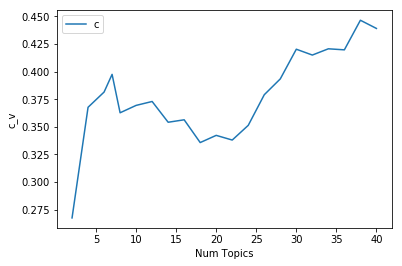

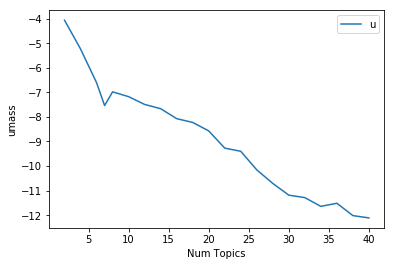

In [138]:
plt.plot(num_topic_list, cv)
plt.xlabel("Num Topics")
plt.ylabel("c_v")
plt.legend(("coherence_values"), loc='best')
plt.show()

plt.plot(num_topic_list, umass)
plt.xlabel("Num Topics")
plt.ylabel("umass")
plt.legend(("umass"), loc='best')
plt.show()

The coherence score peaks for 30 topics and then stays constant then again it tends to increase as the number of topics reach 40 peak.40 topics seems a bit too much given the fact that these are health tweets. We will go ahead and try to visualize the model using 30 topics in the next section.

### <font color=tan>Visualizing and publishing results</font>

In [144]:
ldamodel = Lda(corpus, id2word = dictionary,num_topics = 30,
               random_state =  100, update_every = 5, chunksize = 1000,
               passes = 10, alpha = 'auto', per_word_topics = True)

In [140]:
coherence_model_lda_cv = CoherenceModel(model=ldamodel, texts=docs, 
                                         dictionary=dictionary, coherence='c_v')
coherence_lda_cv = coherence_model_lda_cv.get_coherence()
    
coherence_model_lda_umass = CoherenceModel(model=ldamodel, texts=docs, 
                                         dictionary=dictionary, coherence='u_mass')
coherence_lda_umass = coherence_model_lda_umass.get_coherence() 
print(coherence_lda_cv)
print(coherence_lda_umass)
print(coherence_model_lda_cv.get_coherence_per_topic())

0.39749067282180073
-7.537825187461146
[0.5370323906957225, 0.49618919032544345, 0.3606831099795242, 0.2967465735908892, 0.4581819049036201, 0.2869555600156357, 0.34664598024176957]


#### <font color=tan> Word Cloud for top 10 words/ngrams in a topic</font>

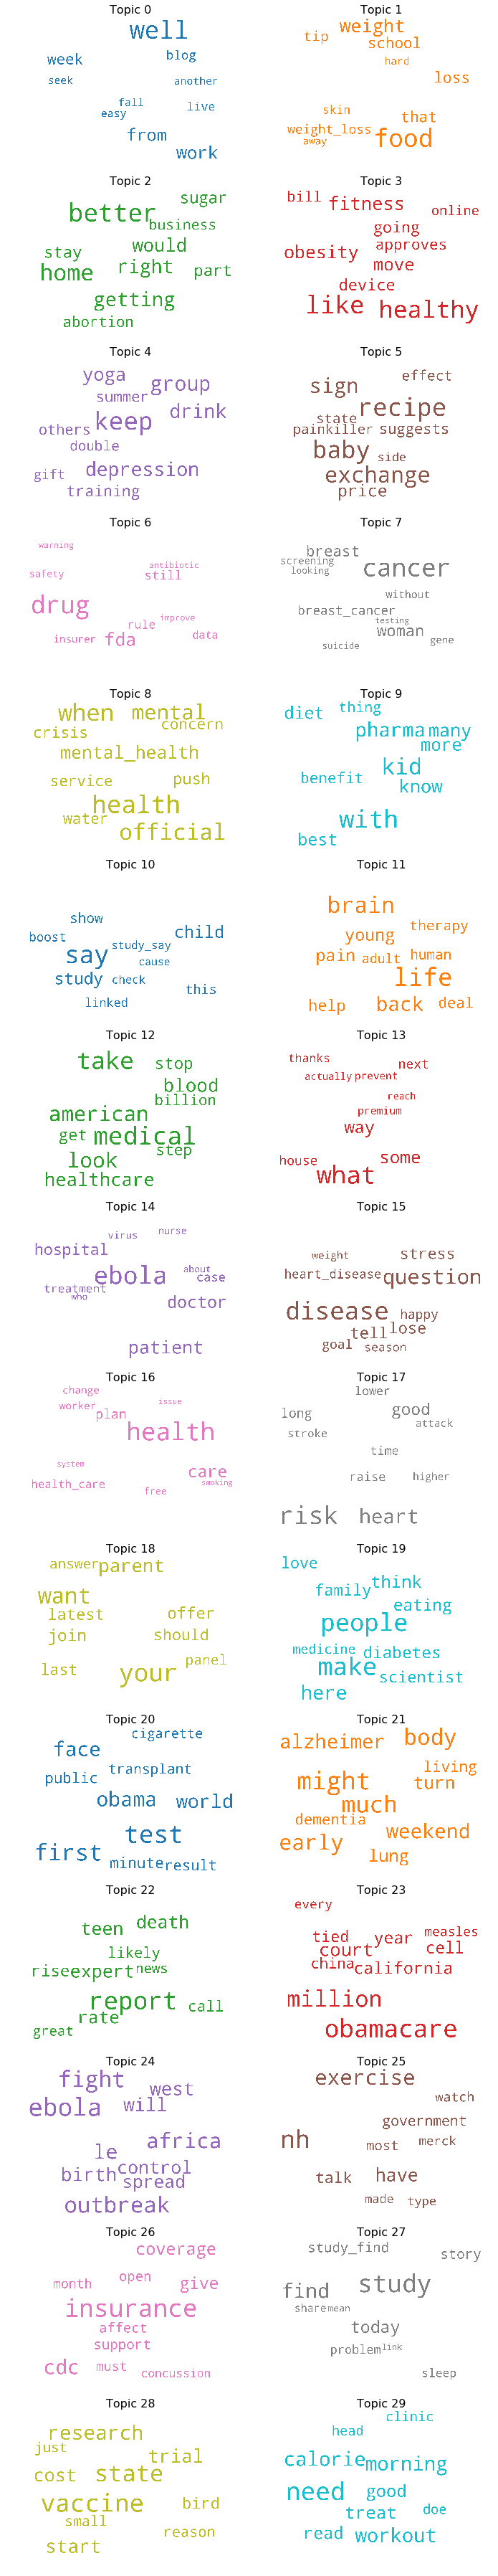

In [174]:
stop_words = set(stopwords.words('english'))
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]*4 

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(num_topics = 30,formatted=False)

fig, axes = plt.subplots(15, 2, figsize=(10, 50), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=10, hspace=10)
plt.axis('off')
plt.margins(x= 10, y= 50)
plt.tight_layout()
plt.show()

#### <font color=tan>Writing cluster output</font>

In [204]:
cluster_frame = pd.DataFrame.from_dict({topics[i][1][j]:i for j in range(10) for i in range(30)},orient='index')
cluster_frame = cluster_frame.reset_index()
cluster_frame.columns = ["Word_Tuple","Cluster"]
cluster_frame[['Word','Probability']] = pd.DataFrame(cluster_frame['Word_Tuple'].to_list(), index = cluster_frame.index)
cluster_frame = cluster_frame[['Cluster','Word','Probability']].sort_values(['Cluster','Probability'],ascending = [1, 0])
cluster_frame.to_csv("Task1_Cluster_Outputs.csv", index = False)
ldamodel.show_topics(num_topics=30, formatted = True)

[(0,
  '0.164*"well" + 0.067*"work" + 0.062*"from" + 0.048*"week" + 0.032*"blog" + 0.030*"live" + 0.024*"easy" + 0.023*"fall" + 0.023*"another" + 0.022*"seek"'),
 (1,
  '0.143*"food" + 0.068*"weight" + 0.046*"loss" + 0.045*"that" + 0.044*"school" + 0.039*"tip" + 0.031*"weight_loss" + 0.026*"skin" + 0.021*"hard" + 0.019*"away"'),
 (2,
  '0.072*"better" + 0.060*"home" + 0.043*"getting" + 0.040*"right" + 0.037*"would" + 0.028*"part" + 0.028*"sugar" + 0.028*"stay" + 0.024*"abortion" + 0.022*"business"'),
 (3,
  '0.087*"like" + 0.081*"healthy" + 0.043*"fitness" + 0.041*"obesity" + 0.039*"move" + 0.032*"device" + 0.031*"going" + 0.029*"approves" + 0.028*"bill" + 0.023*"online"'),
 (4,
  '0.071*"keep" + 0.046*"group" + 0.041*"drink" + 0.041*"depression" + 0.037*"yoga" + 0.025*"training" + 0.023*"summer" + 0.023*"others" + 0.020*"double" + 0.018*"gift"'),
 (5,
  '0.081*"recipe" + 0.077*"baby" + 0.065*"exchange" + 0.056*"sign" + 0.034*"price" + 0.026*"suggests" + 0.024*"effect" + 0.023*"state" 

#### <font color = tan>PyLDAvis Visualization</font >
We use the package pyLDA vis to visualize the results for our LDA model. The lambda parameter on the right hand side can be adjusted to get the most unique words for the topic (when lambda is close to 0) and most commonly occuring words (when lambda is close to 1).

In [149]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary = dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
14     0.055633 -0.313076  1       1        6.555303
16    -0.329240  0.014487  2       1        4.833469
9      0.092802  0.078394  3       1        4.806454
10     0.101370  0.168921  4       1        4.014482
17     0.064172  0.073124  5       1        4.005273
27     0.116475  0.165594  6       1        3.818125
6     -0.037589 -0.062127  7       1        3.746794
19     0.019603  0.011333  8       1        3.726191
22     0.014103 -0.041172  9       1        3.716018
12    -0.018577  0.026289  10      1        3.681482
0      0.021998  0.009690  11      1        3.604740
11     0.074691  0.029531  12      1        3.511596
1      0.077640  0.052493  13      1        3.414154
29     0.069825  0.038018  14      1        3.145001
3     -0.025869  0.019863  15      1        3.120444
18     0.018155  0.002322  16      1        3.046550
7      0.033779  0.062436  17      1        2.997271
28    -0.067446 -0.069139  18      1        2.981308
2     -0.008642  0.017738  19      1        2.867972
23     0.034776 -0.121714  20      1        2.859455
13     0.028859 -0.008887  21      1        2.855857
25    -0.007386  0.003568  22      1        2.844279
20    -0.080867  0.017594  23      1        2.835186
24     0.096035 -0.265955  24      1        2.803112
26    -0.088828  0.034628  25      1        2.735151
21     0.059906  0.014011  26      1        2.522578
5     -0.064310 -0.040683  27      1        2.449892
15     0.026594  0.022812  28      1        2.364624
8     -0.295822  0.043224  29      1        2.084507
4      0.018162  0.016685  30      1        2.052727, topic_info=     Category         Freq         Term        Total  loglift  logprob
46    Default  6633.000000  health       6633.000000  30.0000  30.0000
152   Default  5799.000000  ebola        5799.000000  29.0000  29.0000
90    Default  3289.000000  drug         3289.000000  28.0000  28.0000
470   Default  3965.000000  study        3965.000000  27.0000  27.0000
3     Default  2893.000000  cancer       2893.000000  26.0000  26.0000
468   Default  2898.000000  say          2898.000000  25.0000  25.0000
1798  Default  2480.000000  well         2480.000000  24.0000  24.0000
195   Default  2015.000000  what         2015.000000  23.0000  23.0000
4     Default  2321.000000  risk         2321.000000  22.0000  22.0000
76    Default  2052.000000  food         2052.000000  21.0000  21.0000
47    Default  2335.000000  patient      2335.000000  20.0000  20.0000
6     Default  2035.000000  care         2035.000000  19.0000  19.0000
1050  Default  1848.000000  find         1848.000000  18.0000  18.0000
193   Default  1612.000000  make         1612.000000  17.0000  17.0000
17    Default  2026.000000  doctor       2026.000000  16.0000  16.0000
12    Default  1541.000000  people       1541.000000  15.0000  15.0000
208   Default  1549.000000  report       1549.000000  14.0000  14.0000
3059  Default  1648.000000  with         1648.000000  13.0000  13.0000
2562  Default  1476.000000  fda          1476.000000  12.0000  12.0000
87    Default  1720.000000  hospital     1720.000000  11.0000  11.0000
221   Default  1194.000000  disease      1194.000000  10.0000  10.0000
18    Default  1269.000000  nh           1269.000000  9.0000   9.0000 
814   Default  1212.000000  insurance    1212.000000  8.0000   8.0000 
11    Default  1501.000000  heart        1501.000000  7.0000   7.0000 
26    Default  1274.000000  life         1274.000000  6.0000   6.0000 
488   Default  1144.000000  like         1144.000000  5.0000   5.0000 
493   Default  1396.000000  kid          1396.000000  4.0000   4.0000 
485   Default  1210.000000  today        1210.000000  3.0000   3.0000 
1184  Default  1092.000000  your         1092.000000  2.0000   2.0000 
192   Default  1066.000000  healthy      1066.000000  1.0000   1.0000 
...       ...          ...      ...              ...     ...

### <font color=tan>Conclusion</font>

**Lets us summarize our observations about few of the topics from the word cloud, printed topics and the pyLDAvis notebook.** *(Topic numbers are consistent with pyLDAvis)*<br>
**Topic 1** : Outbreak of Ebola in Africa. -- **"Ebola"**<br>
**Topic 2** : This topic talks about health care plans. --**"Health Care"**<br>
**Topic 3** : This topic talks about the things that benefits kids. --**"Kids"**<br>
**Topic 4** : This topic talks about the cause of illness in children. --**"Child illness"**<br>
**Topic 5** : This topic talks about lowering heart risk.--**"Heart Risk"**<br>
**Topic 6** : This topic talks about study finding on sleep problems.--**"Sleep Problems"**<br>
**Topic 7** : This topic talks about FDA drug rules.--**"FDA Drugs"**<br>
**Topic 8** : This topic talks about people with diabetes.--**"Diabetes"**<br>
**Topic 9** : This topic talks about rise in teen deaths.--**"Teen Deaths"**<br>
**Topic 10** : This topic talks about american healthcare.--**"US HealthCare"**

We can summarize the other topics as well.